In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# tree visualization

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)

In [6]:
print(tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="worst perimeter <= 106.1\ngini = 0.4679\nsamples = 426\nvalue = [159, 267]"] ;
1 [label="worst concave points <= 0.1339\ngini = 0.0813\nsamples = 259\nvalue = [11, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0083\nsamples = 240\nvalue = [1, 239]"] ;
1 -> 2 ;
3 [label="gini = 0.4986\nsamples = 19\nvalue = [10, 9]"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.1416\ngini = 0.2017\nsamples = 167\nvalue = [148, 19]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.4967\nsamples = 37\nvalue = [20, 17]"] ;
4 -> 5 ;
6 [label="gini = 0.0303\nsamples = 130\nvalue = [128, 2]"] ;
4 -> 6 ;
}


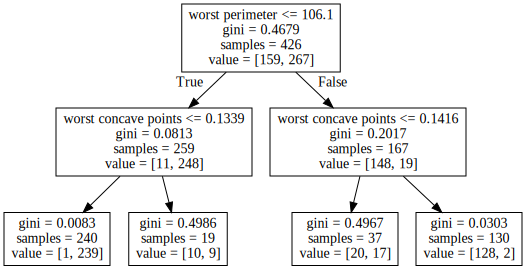

In [7]:
import graphviz
graphviz.Source(tree_dot)

# Parameter Tuning

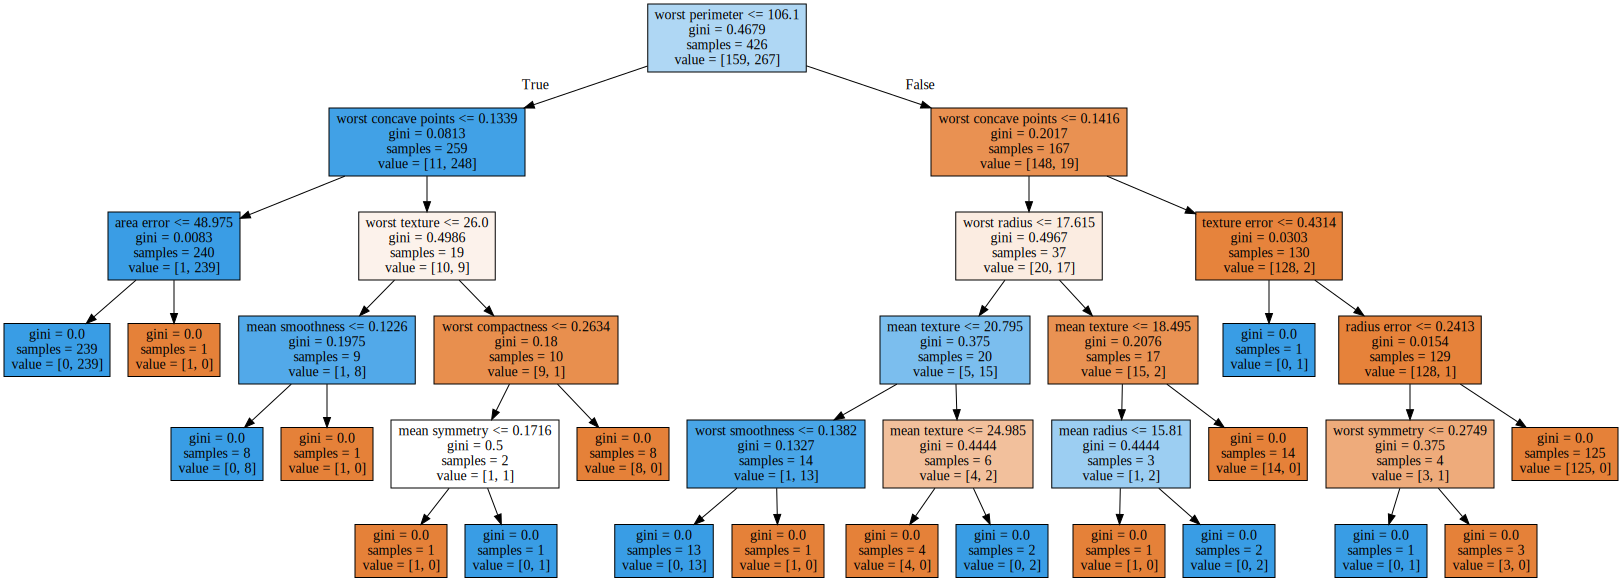

In [8]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graphviz.Source(tree_dot, format="png")


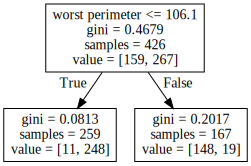

In [9]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graphviz.Source(tree_dot, format="png")

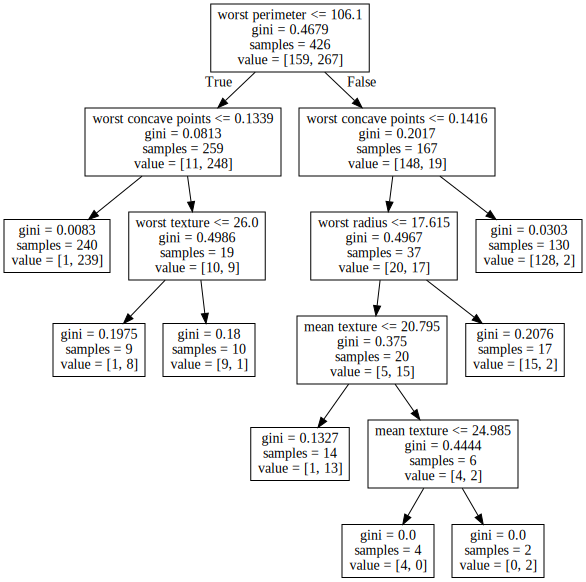

In [10]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graphviz.Source(tree_dot, format="png")

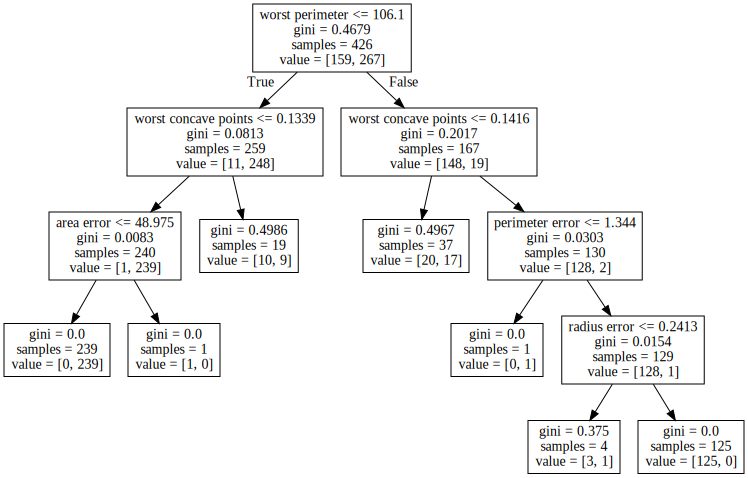

In [11]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graphviz.Source(tree_dot, format="png")

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
import os
print(os.environ.get('JOBLIB_START_METHOD'))

None


In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100))
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=None, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

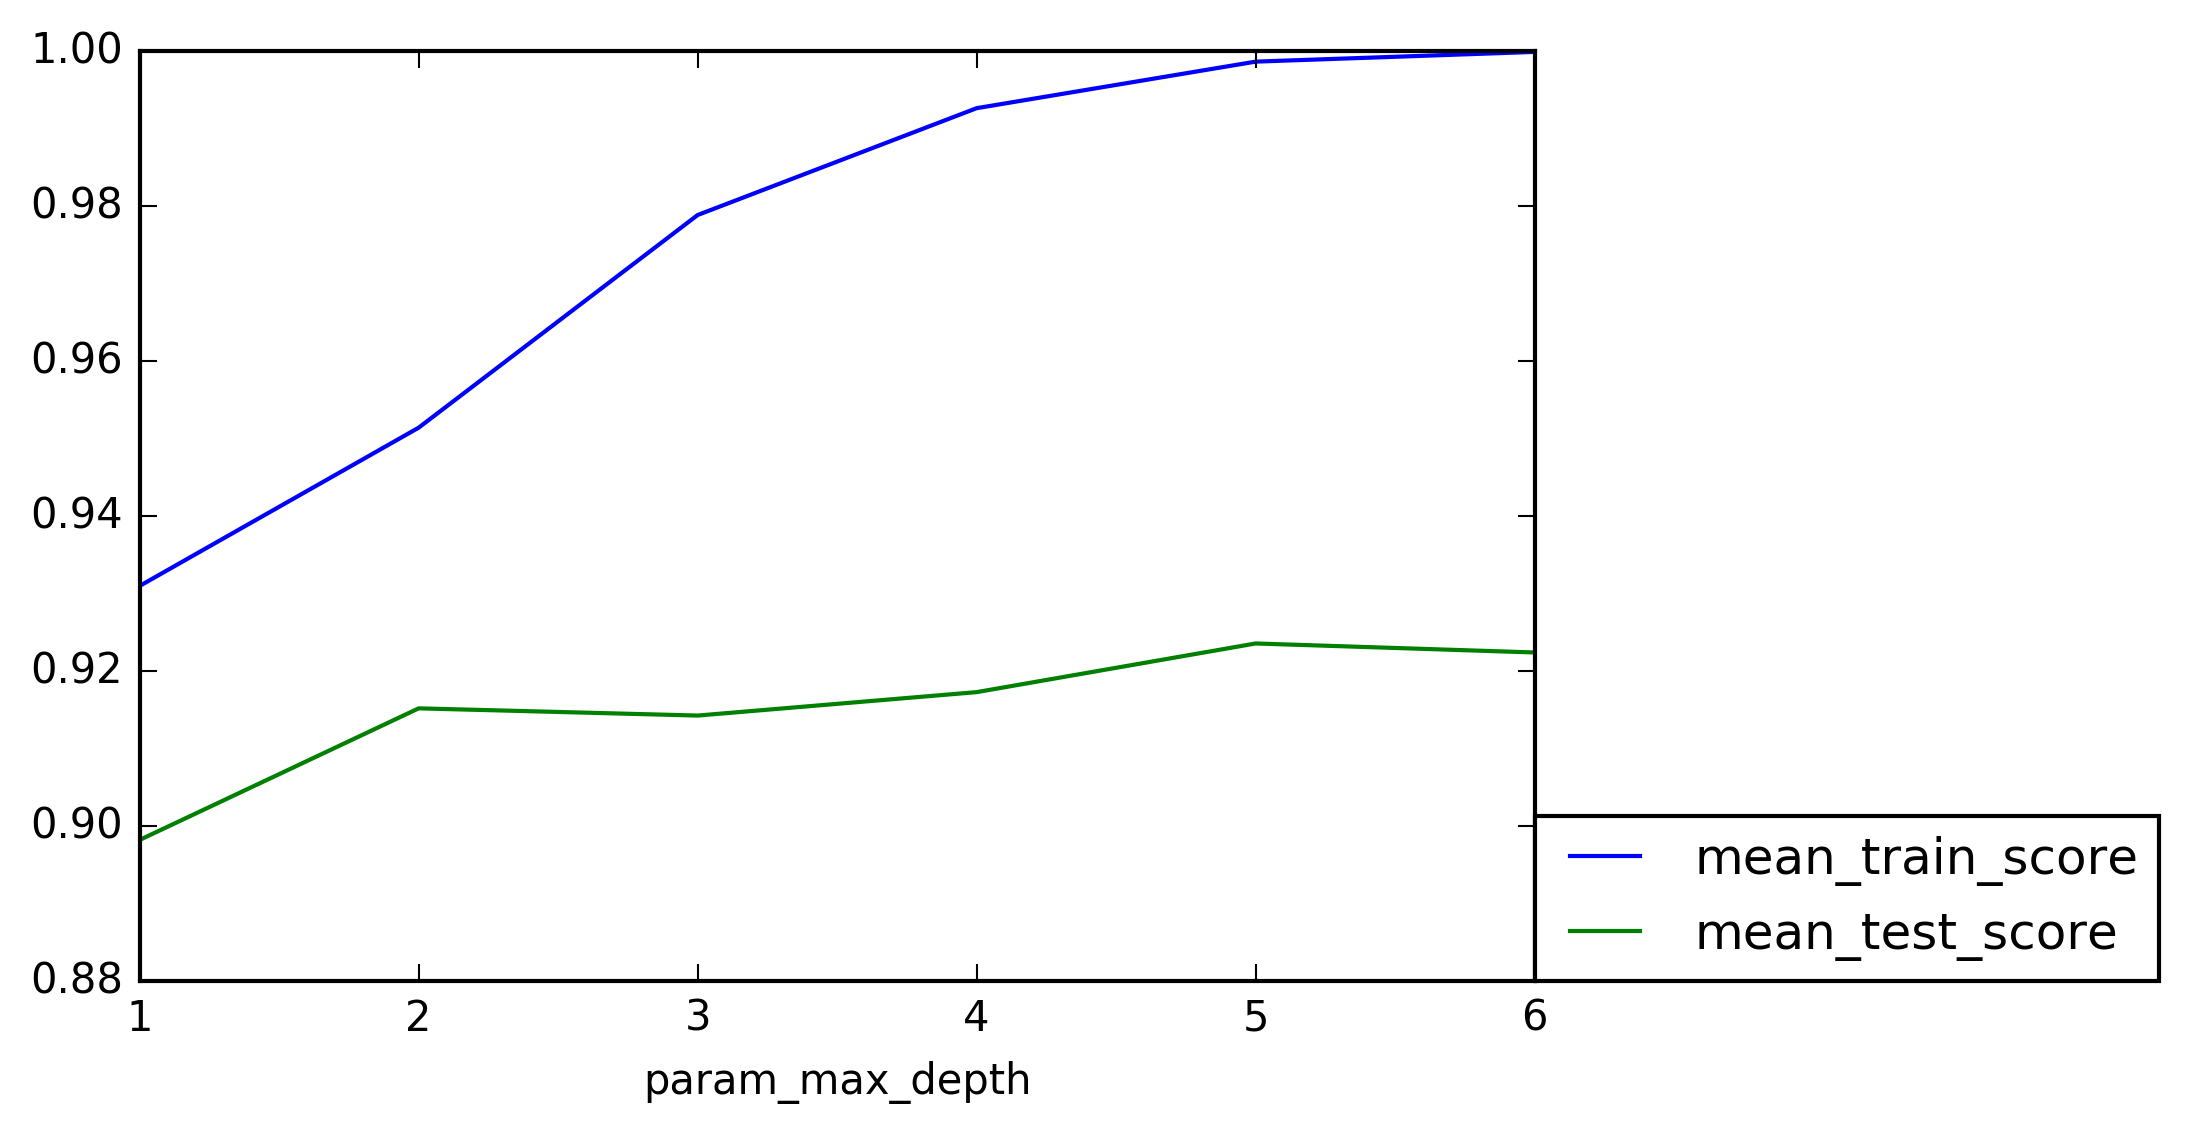

In [14]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0));

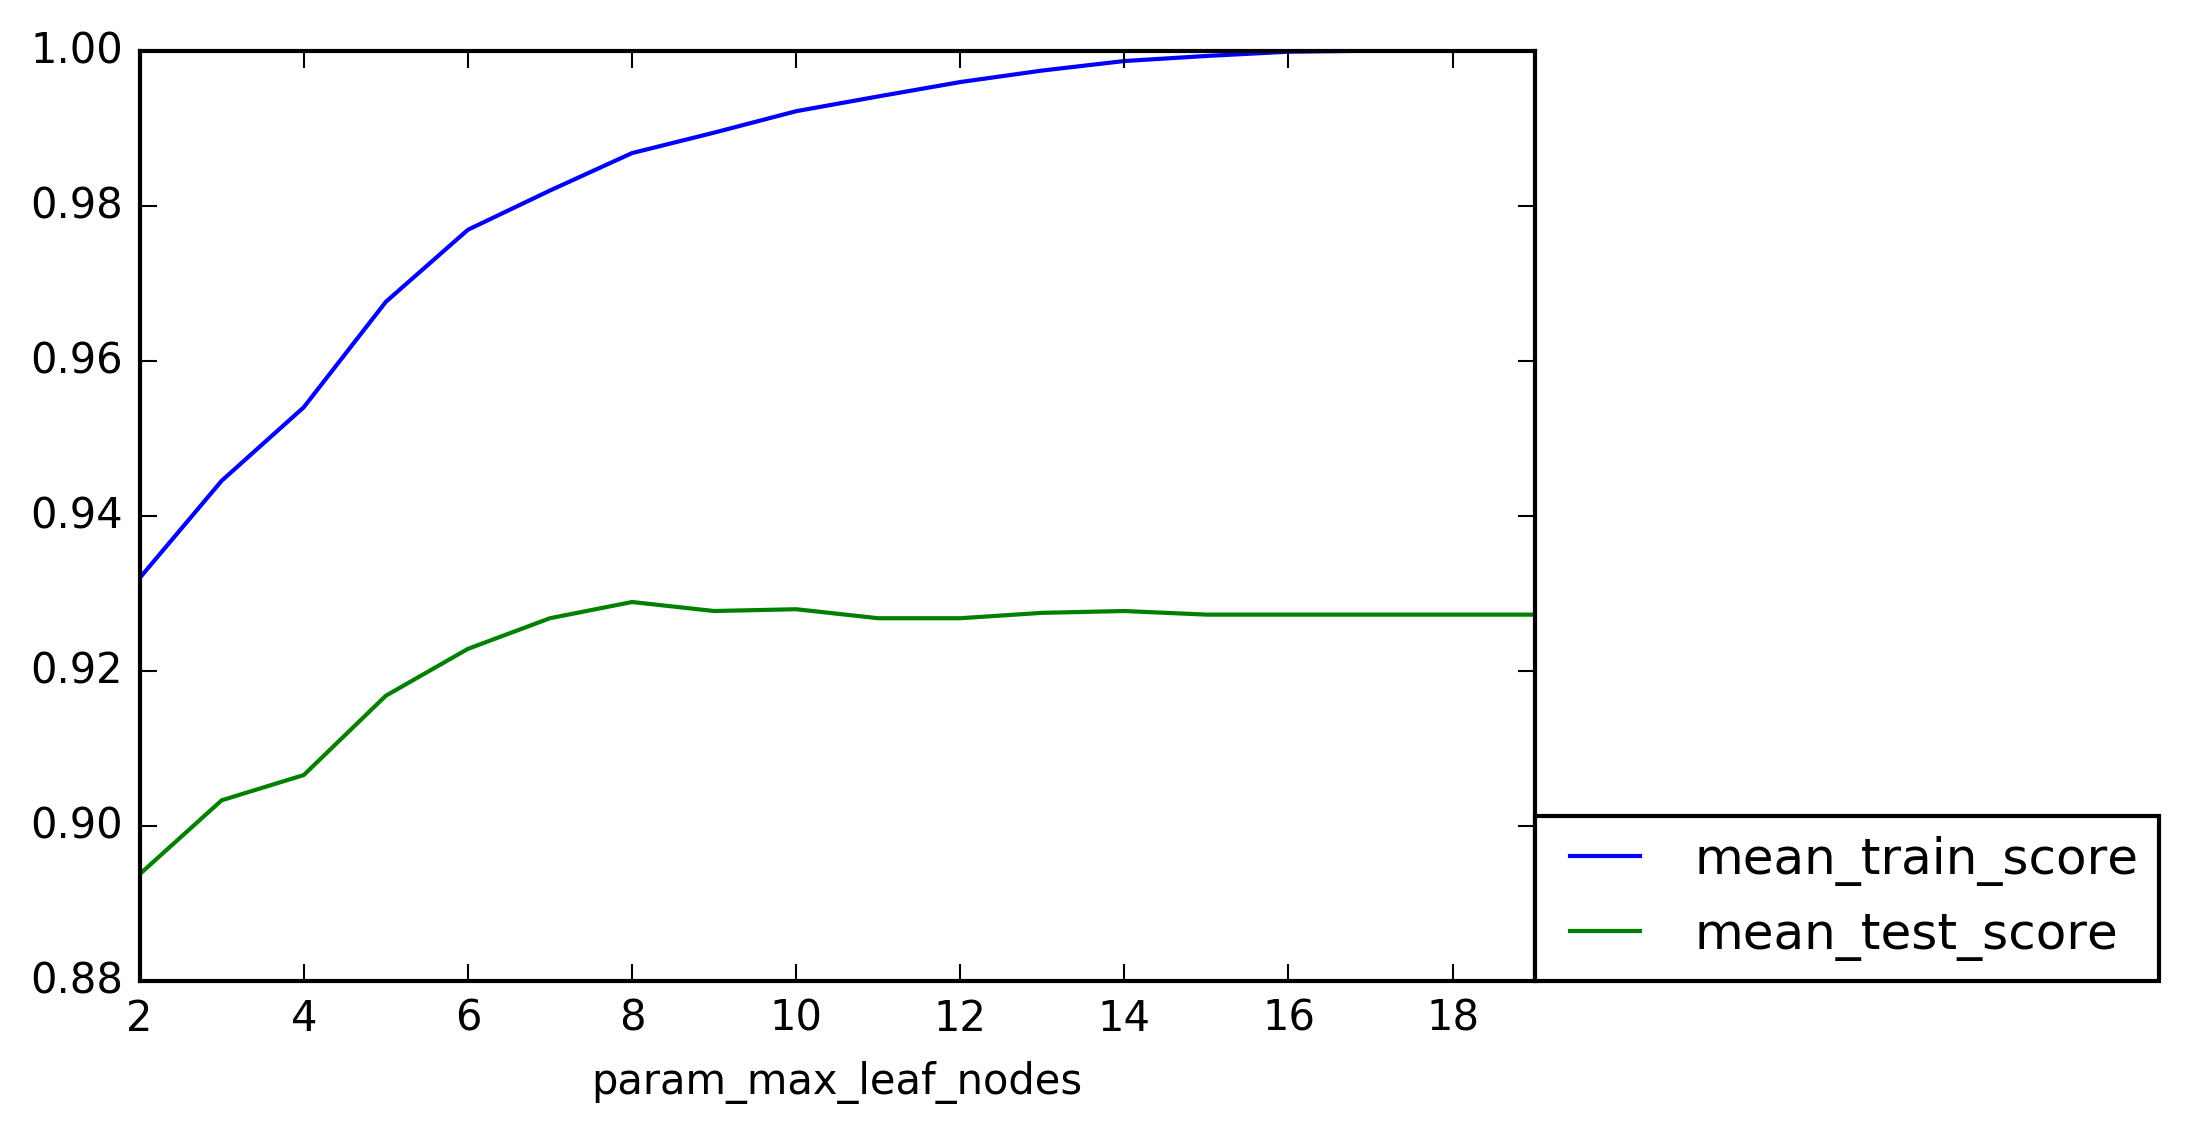

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1))
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0));

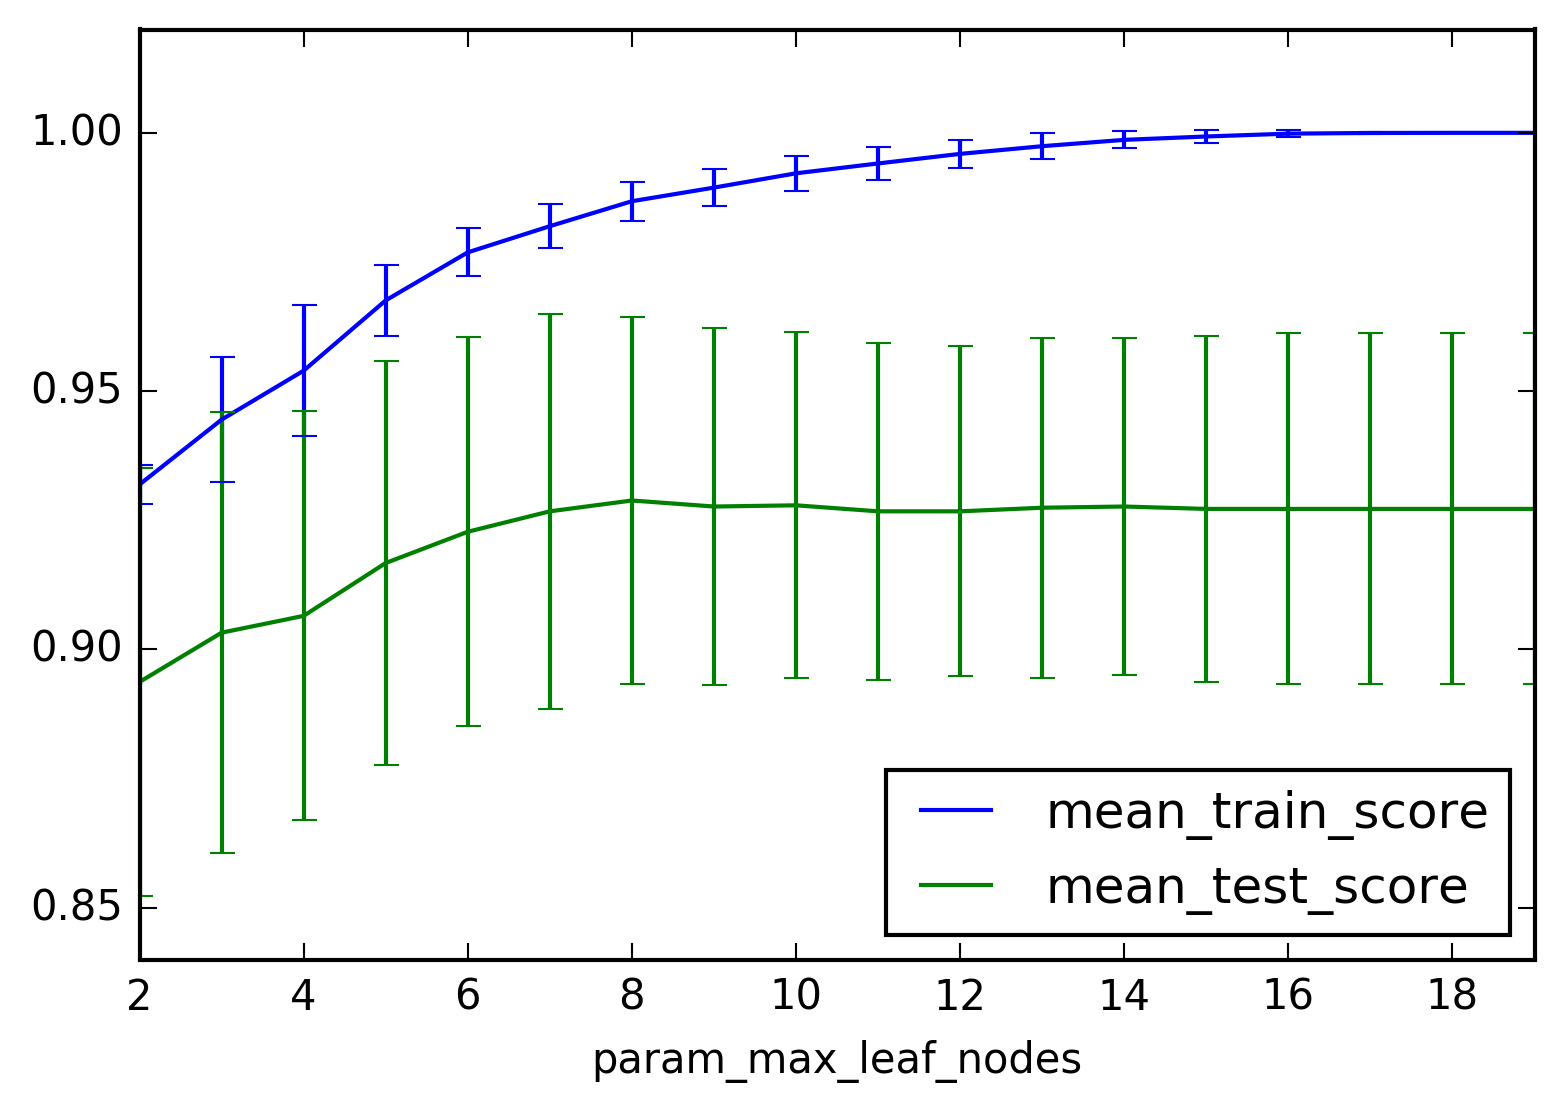

In [16]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca());

In [17]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph;

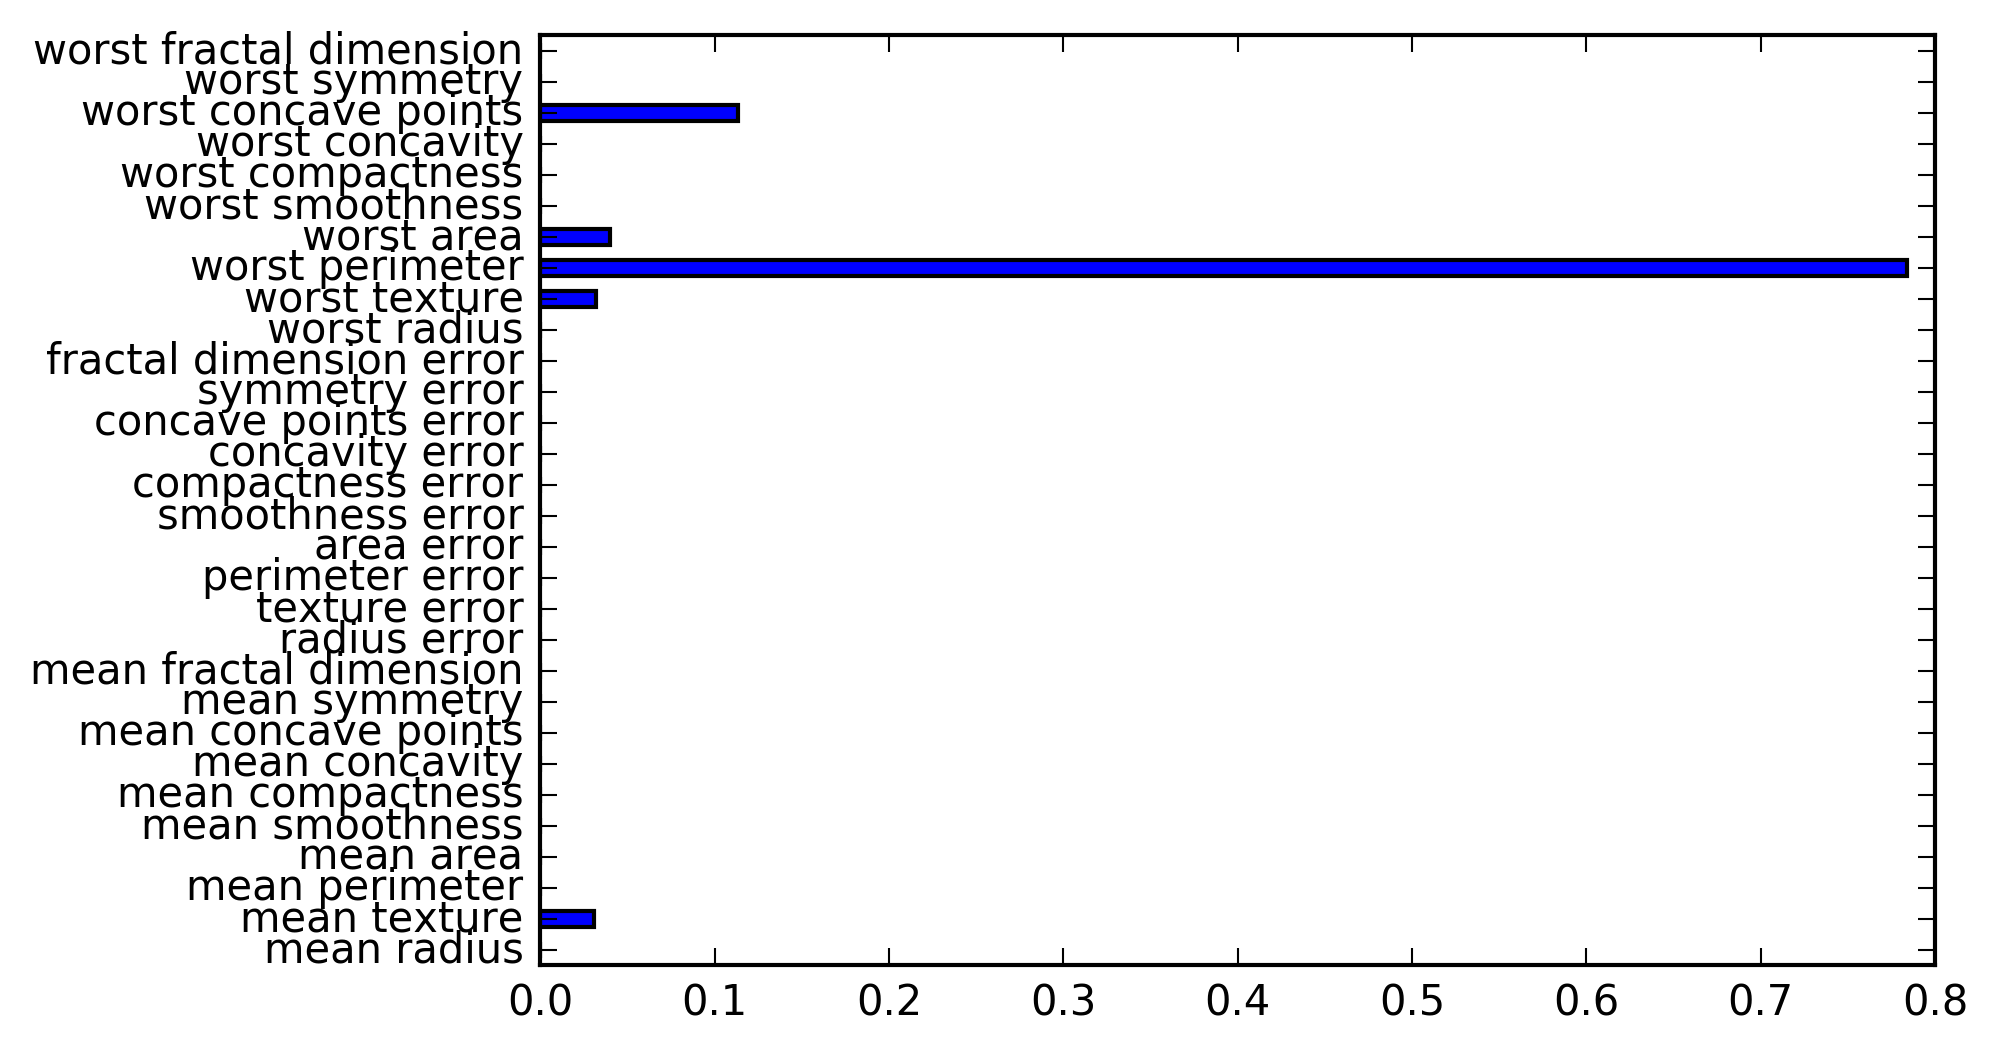

In [18]:
pd.Series(grid.best_estimator_.feature_importances_, index=cancer.feature_names).plot(kind="barh");

# Exercise
Apply a decision tree to the "adult" dataset and visualize it.

Tune parameters with grid-search; try at least max_leafs and max_depth, but separately.

Visualize the resulting tree and it's feature importances.

In [19]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv(
    "adult.data", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# this column is somewhat meaningless in this context
data = data.drop("fnlwgt", axis=1)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
X = data.drop('income', axis=1)
X = pd.get_dummies(X)
y = data['income']

dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
tree_dot = export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True)
graphviz.Source(tree_dot, format="png");

In [22]:
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X,y)
print(grid.best_params_)

{'max_depth': 6}


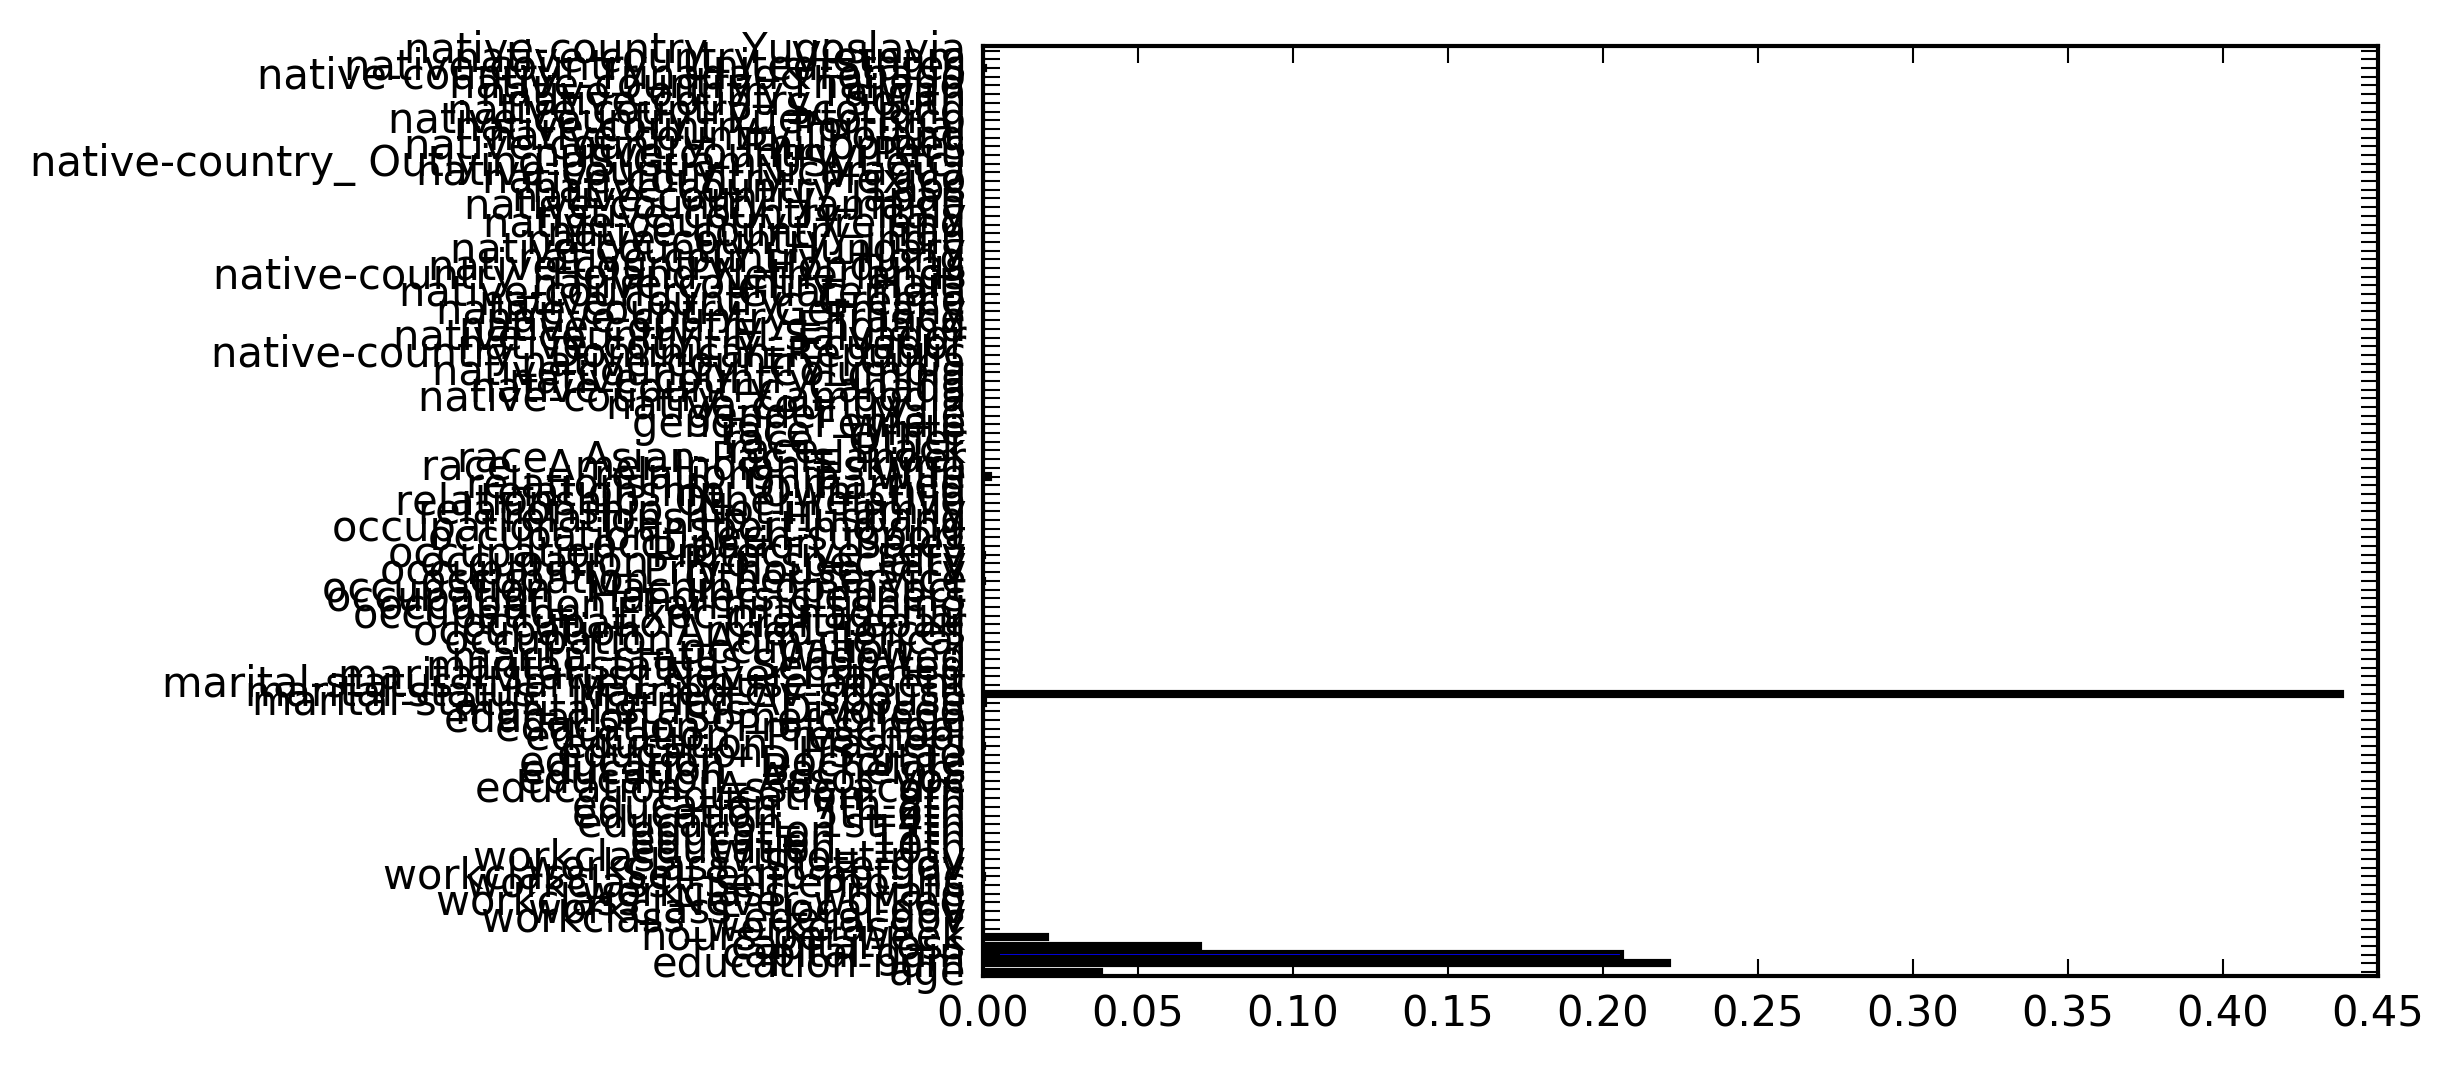

In [23]:
pd.Series(grid.best_estimator_.feature_importances_, index=X.columns).plot(kind="barh");

In [24]:
param_grid = {'max_leaf_nodes':range(2, 22)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X,y)
print(grid.best_params_)

{'max_leaf_nodes': 21}


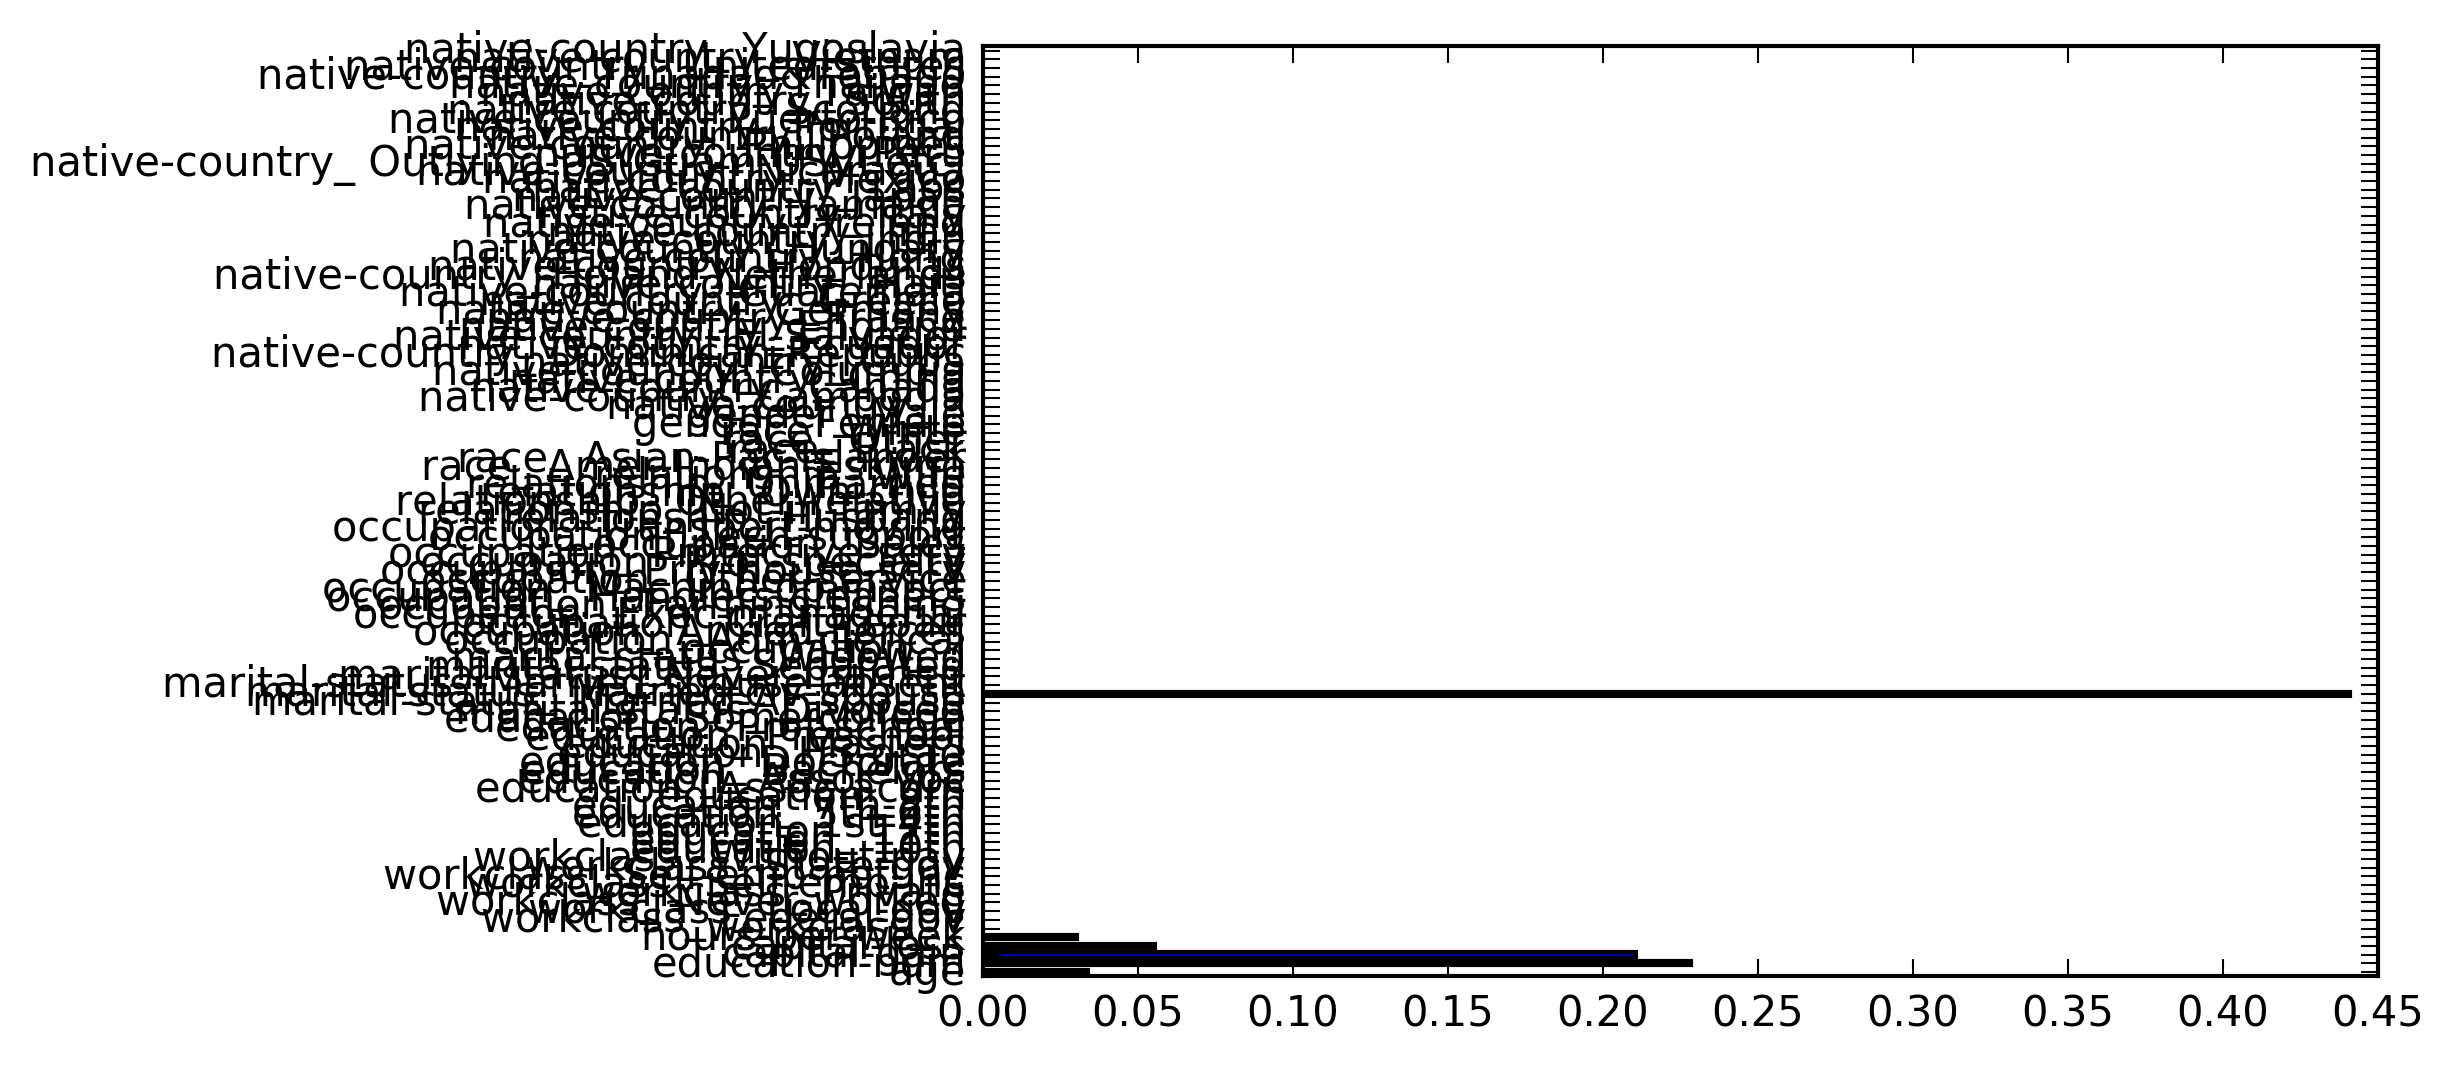

In [25]:
pd.Series(grid.best_estimator_.feature_importances_, index=X.columns).plot(kind="barh");

In [26]:
dt = DecisionTreeClassifier(random_state=0, max_leaf_nodes=21, max_depth=6)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=21, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

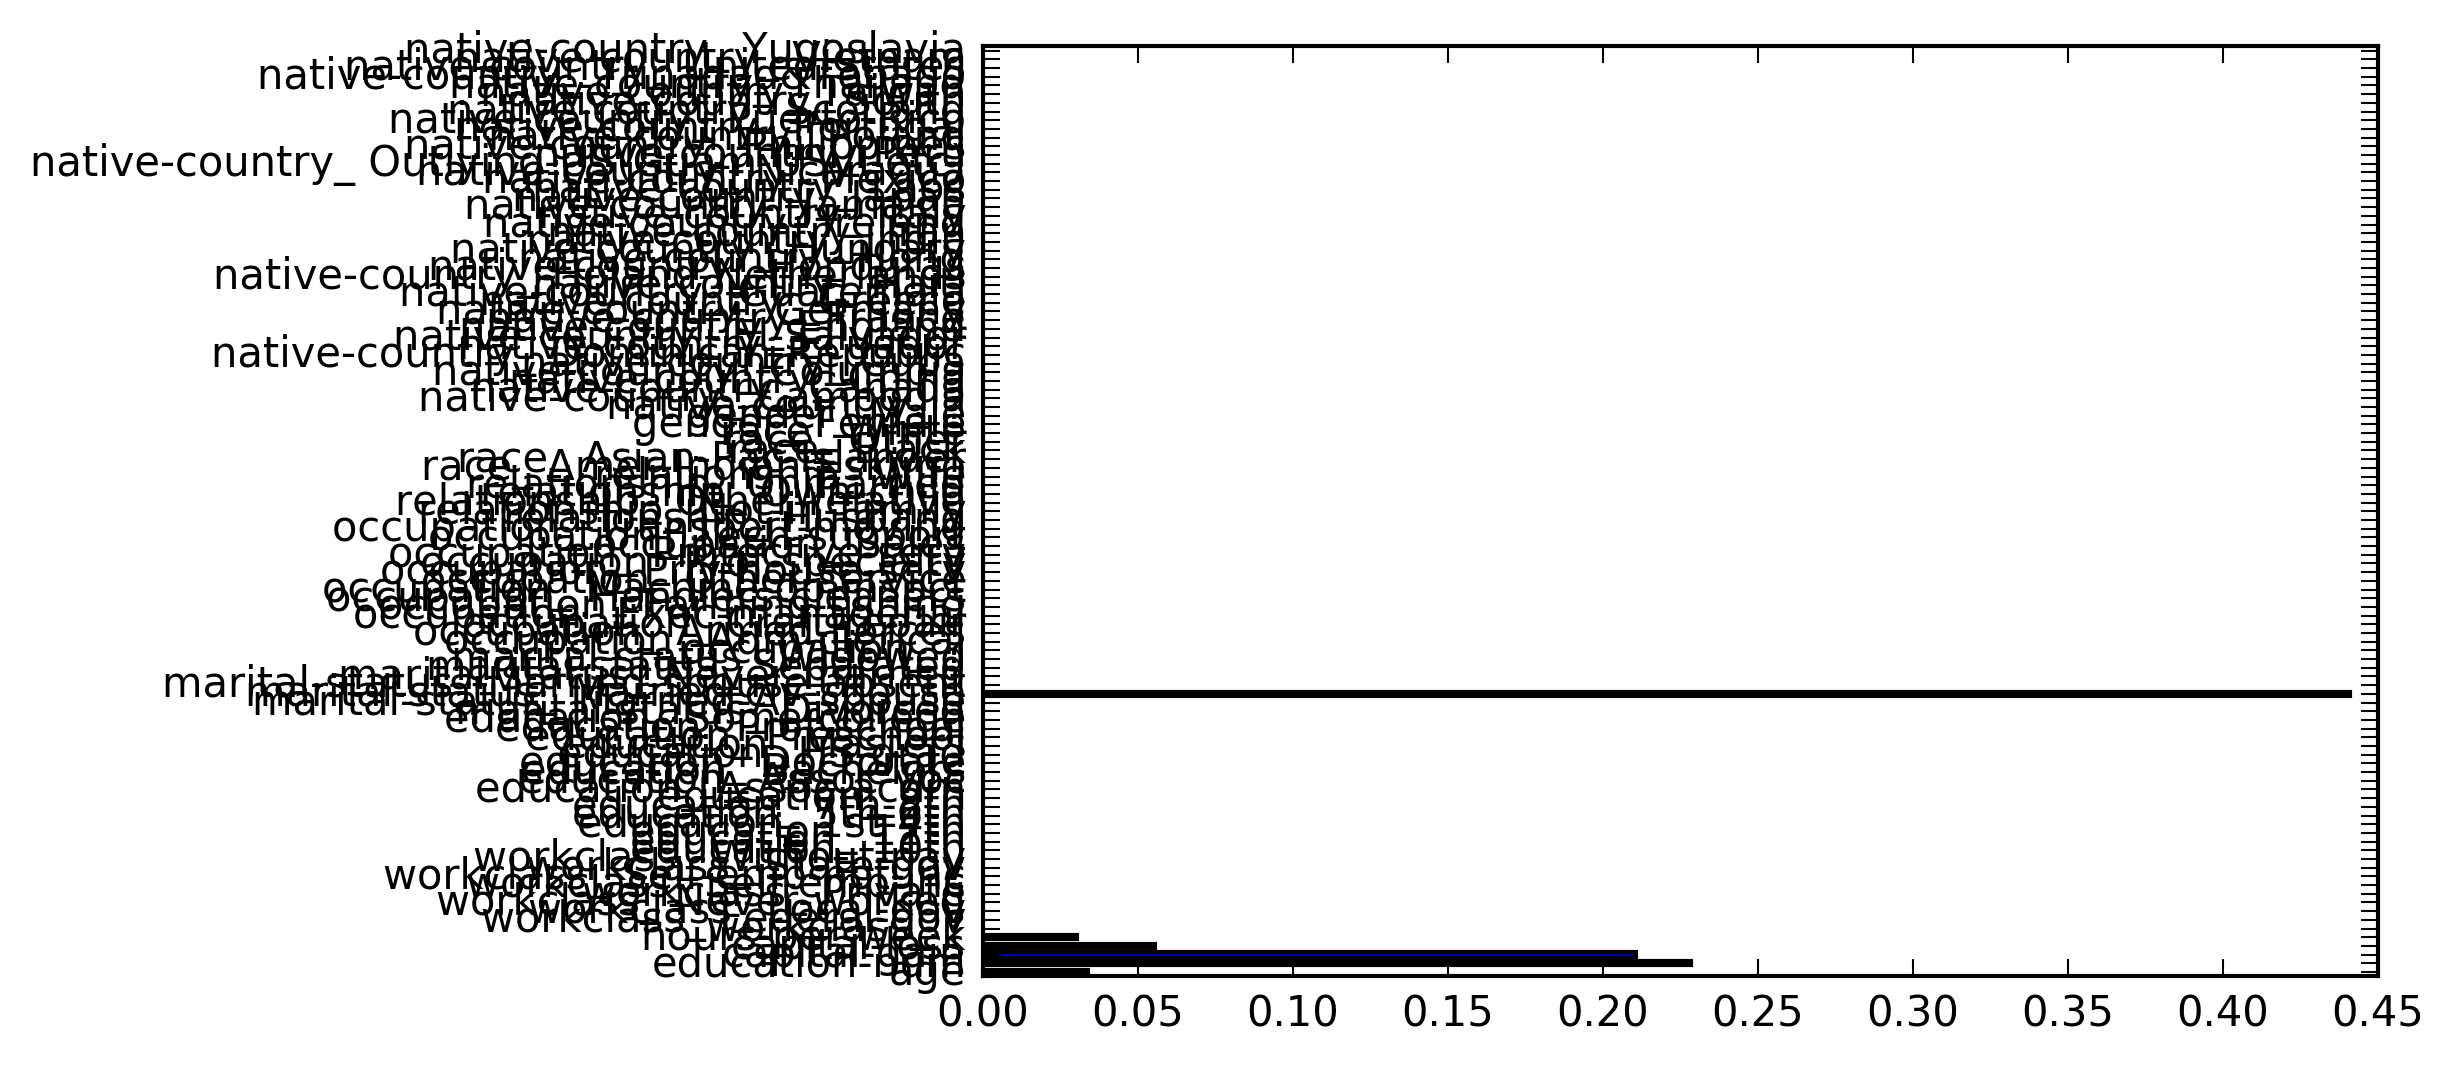

In [27]:
pd.Series(grid.best_estimator_.feature_importances_, index=X.columns).plot(kind="barh");

In [28]:
tree_dot = export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True)
graphviz.Source(tree_dot, format="png");